In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
path = "//Volumes/data_files/UKB_data/immune_result/cox2/Enrichr/SLE"
# GO_Biological_Process_2023_table.txt 
# GO_Cellular_Component_2023_table.txt KEGG_2021_Human_table.txt
# GO_Molecular_Function_2023_table.txt Reactome_Pathways_2024_table.txt

go_bp = pd.read_csv(f"{path}/GO_Biological_Process_2023_table.txt", sep="\t")
go_cc = pd.read_csv(f"{path}/GO_Cellular_Component_2023_table.txt", sep="\t")
go_mf = pd.read_csv(f"{path}/GO_Molecular_Function_2023_table.txt", sep="\t")
kegg = pd.read_csv(f"{path}/KEGG_2021_Human_table.txt", sep="\t")
reactome = pd.read_csv(f"{path}/Reactome_Pathways_2024_table.txt", sep="\t")

In [2]:
def clean_enrichr_data(df):
    df['Significant'] = df['Adjusted P-value'] < 0.05  # 判断显著性
    df = df[df['Significant']]  # 仅保留显著性结果
    df['Observed Proteins'] = df['Overlap'].str.split('/').str[0].astype(int)  # 提取观察到的蛋白质数量
    df["Term"] = df["Term"].apply(lambda x: re.sub(r'\s*\(.*?\)', '', x))
    df = df.sort_values('Adjusted P-value').head(10)
    df['Term'] = pd.Categorical(df['Term'], categories=df['Term'], ordered=True)
    return df

In [3]:
go_bp = clean_enrichr_data(go_bp)
go_cc = clean_enrichr_data(go_cc)
go_mf = clean_enrichr_data(go_mf)
kegg = clean_enrichr_data(kegg)
reactome = clean_enrichr_data(reactome)
go_bp['group'] = 'GO_BP'
go_cc['group'] = 'GO_CC'
go_mf['group'] = 'GO_MF'
kegg['group'] = 'KEGG'
reactome['group'] = 'Reactome'

# 拼接所有数据框
combined_df = pd.concat([go_bp, go_cc, go_mf, kegg, reactome], ignore_index=True)
# combined_df = pd.concat([go_bp, go_cc, go_mf, reactome], ignore_index=True)
combined_df['-log10(Adjusted P-value)'] = -np.log10(combined_df['Adjusted P-value'])
combined_df

/var/folders/sy/n_c36kvx487143mhq4gvc7b40000gn/T/ipykernel_62591/3710441818.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Observed Proteins'] = df['Overlap'].str.split('/').str[0].astype(int)  # 提取观察到的蛋白质数量
/var/folders/sy/n_c36kvx487143mhq4gvc7b40000gn/T/ipykernel_62591/3710441818.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Term"] = df["Term"].apply(lambda x: re.sub(r'\s*\(.*?\)', '', x))
/var/folders/sy/n_c36kvx487143mhq4gvc7b40000gn/T/ipykernel_62591/3710441818.py:4: SettingWithCopy

,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,Significant,Observed Proteins,group,-log10(Adjusted P-value)
0,Inflammatory Response,41/108,3.975811e-08,1.028542e-04,0,0,3.281218,55.913443,SERPINA3;CSF1R;ORM1;CXCL9;CCL11;CXCL8;ADM;CXCL...,True,41,GO_BP,3.987778
1,Regulation Of T Cell Proliferation,24/49,1.103688e-07,1.245626e-04,0,0,5.044706,80.813355,CD86;IL10;CD274;VCAM1;IL15;CD70;CD80;PLA2G2A;L...,True,24,GO_BP,3.904612
2,Negative Regulation Of T Cell Activation,17/28,1.444483e-07,1.245626e-04,0,0,8.045650,126.721750,CD86;IL10;CD274;CD80;FGL1;PLA2G2A;LILRB1;PDCD1...,True,17,GO_BP,3.904612
3,Positive Regulation Of ERK1 And ERK2 Cascade,34/86,1.945918e-07,1.258522e-04,0,0,3.473103,53.667639,CSF1R;SEMA7A;CCL11;CXCL17;TREM2;TNFRSF11A;TNF;...,True,34,GO_BP,3.900139
4,Negative Regulation Of Cytokine Production,27/61,2.471901e-07,1.277673e-04,0,0,4.184791,63.663678,CD274;ORM1;TREM2;TNF;DLL1;CX3CL1;IFNL1;IL12B;L...,True,27,GO_BP,3.893580
5,Lymphocyte Chemotaxis,17/29,2.963292e-07,1.277673e-04,0,0,7.372139,110.816478,CCL11;CCL21;CCL20;CXCL13;CX3CL1;CXCL16;CXCL10;...,True,17,GO_BP,3.893580
6,Cytokine-Mediated Signaling Pathway,45/132,3.523601e-07,1.302222e-04,0,0,2.775154,41.234930,YAP1;CSF1R;CXCL9;CCL11;CXCL8;TNFRSF11A;LILRA2;...,True,45,GO_BP,3.885315
7,Monocyte Chemotaxis,18/33,5.790329e-07,1.872448e-04,0,0,6.250323,89.766549,CALCA;CCL11;CCL21;CCL20;TNFRSF11A;CX3CL1;LGALS...,True,18,GO_BP,3.727590
8,Cellular Response To Lipopolysaccharide,23/50,8.554993e-07,2.213177e-04,0,0,4.462963,62.354647,CD86;IL10;CD274;CXCL9;TGFB1;CXCL8;CD80;IL18;LY...,True,23,GO_BP,3.654984
9,Negative Regulation Of T Cell Proliferation,14/22,8.501957e-07,2.213177e-04,0,0,9.063433,126.686844,CD86;IL10;CD274;CD80;CRTAM;PLA2G2A;LILRB1;LILR...,True,14,GO_BP,3.654984


In [4]:
explain_df = combined_df[['Term','group']]
explain_df

,Term,group
0,Inflammatory Response,GO_BP
1,Regulation Of T Cell Proliferation,GO_BP
2,Negative Regulation Of T Cell Activation,GO_BP
3,Positive Regulation Of ERK1 And ERK2 Cascade,GO_BP
4,Negative Regulation Of Cytokine Production,GO_BP
5,Lymphocyte Chemotaxis,GO_BP
6,Cytokine-Mediated Signaling Pathway,GO_BP
7,Monocyte Chemotaxis,GO_BP
8,Cellular Response To Lipopolysaccharide,GO_BP
9,Negative Regulation Of T Cell Proliferation,GO_BP


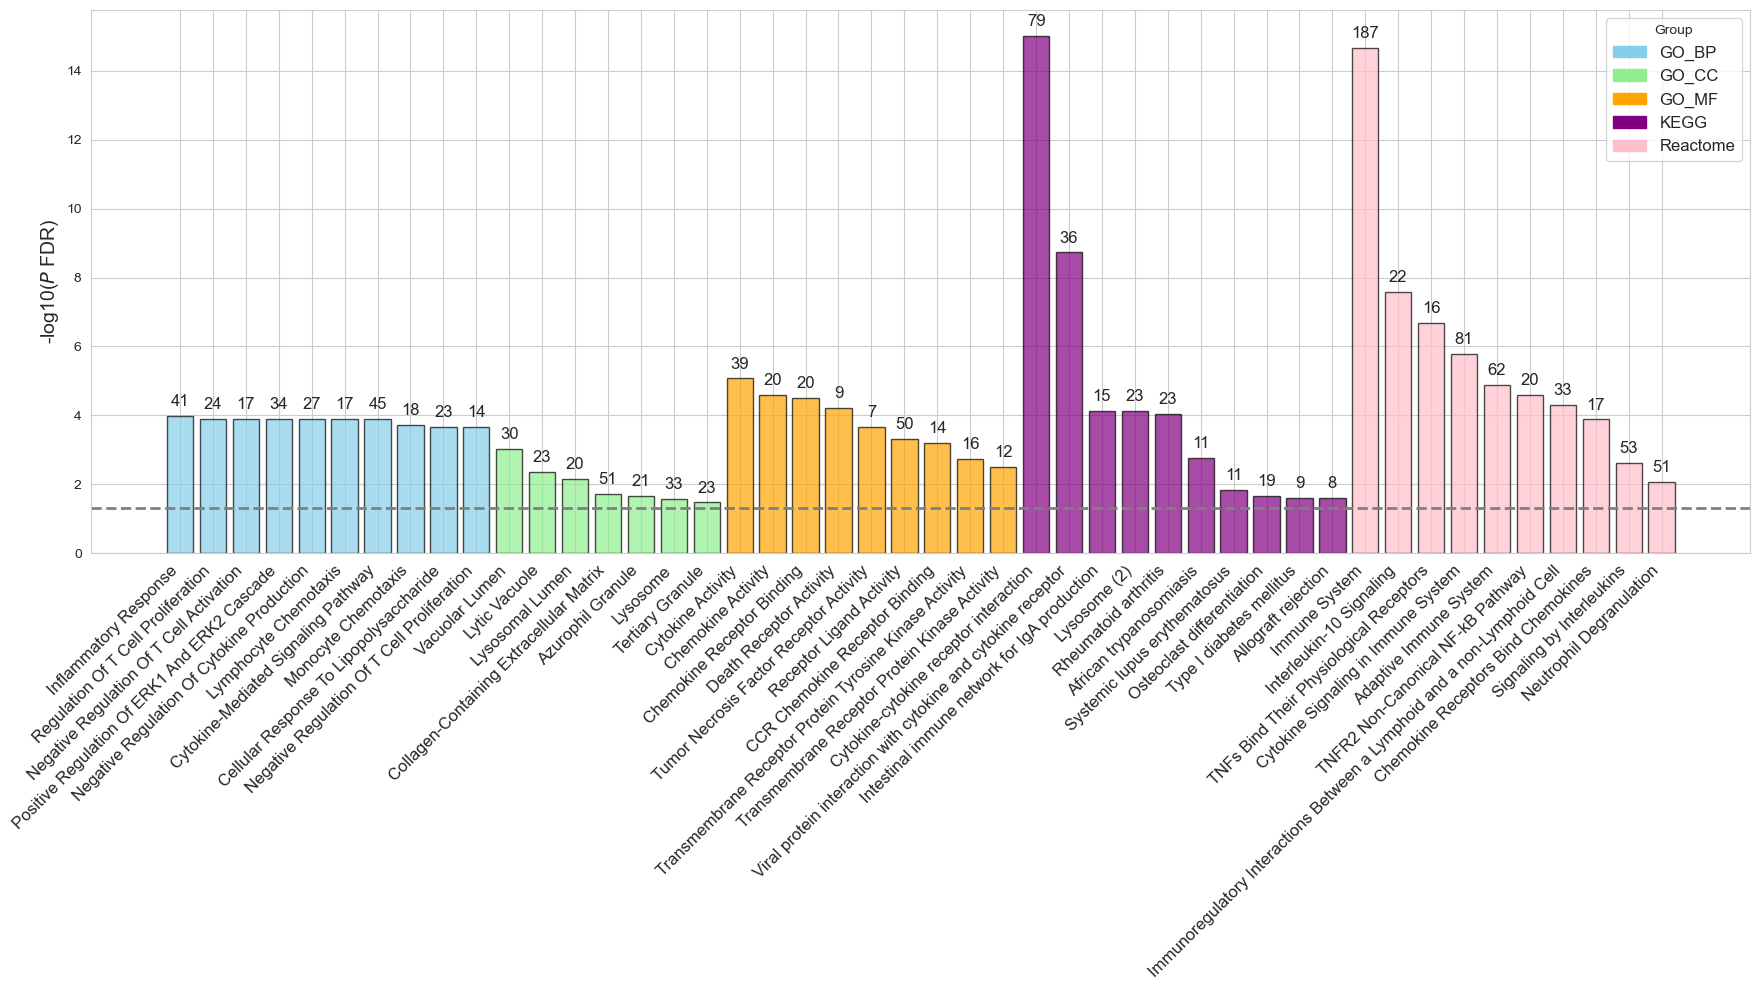

In [7]:
import matplotlib.pyplot as plt

def resolve_duplicates(terms):
    counts = {}
    unique_terms = []
    for term in terms:
        if term in counts:
            counts[term] += 1
            unique_terms.append(f"{term} ({counts[term]})")
        else:
            counts[term] = 1
            unique_terms.append(term)
    return unique_terms

# 修改 combined_df 的 Term 列，避免重名
combined_df['Unique_Term'] = resolve_duplicates(combined_df['Term'])

# 颜色映射（为每个组定义颜色）
group_colors = {
    'GO_BP': 'skyblue',
    'GO_CC': 'lightgreen',
    'GO_MF': 'orange',
    'KEGG': 'purple',
    'Reactome': 'pink'
}

# 获取颜色列表
bar_colors = combined_df['group'].map(group_colors)

# 绘制柱状图
plt.figure(figsize=(18, 10))  # 增加图的宽高，避免拥挤
bars = plt.bar(
    combined_df['Unique_Term'],  # 使用去重后的 Term
    combined_df['-log10(Adjusted P-value)'],
    color=bar_colors,
    edgecolor='black',
    alpha=0.7
)

# 添加每个条的观察到蛋白质数量
for bar, proteins in zip(bars, combined_df['Observed Proteins']):
    bar_height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar_height + 0.2,  # 更高于柱条顶部，避免重叠
        str(proteins),
        ha='center',
        va='bottom',
        fontsize=12,  # 减小字体大小以避免挤占空间
    )

# 添加显著性虚线
# 设定阈值为 -log10(0.05) ≈ 1.3，这表示 P-value < 0.05
significance_threshold = 1.3
plt.axhline(y=significance_threshold, color='grey', linestyle='--', linewidth=2)

# 添加图例
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in group_colors.values()]
labels = group_colors.keys()
plt.legend(handles, labels, title='Group', loc='upper right', fontsize=12)

# 调整 X 轴标签
plt.xticks(
    ticks=range(len(combined_df['Unique_Term'])),  # 保证每个Term有一个刻度
    labels=combined_df['Unique_Term'],
    rotation=45,  # 旋转以适应空间
    ha='right',
    fontsize=12
)

# 图形美化
plt.ylabel(r'-log10($\it{P}$ FDR)', fontsize=14)
# plt.xlabel('GO Term', fontsize=14)
# plt.title('Top Significant GO Terms by -log10(Adjusted P-value)', fontsize=16)

# 调整布局
plt.tight_layout()  # 自动调整布局以减少重叠

# 保存图形
plt.savefig(
    '/Volumes/data_files/UKB_data/immune_result/cox2/Enrichr/SLE/enrichr.pdf',
    format='pdf',
    bbox_inches='tight'
)
